In [2]:
import pandas as pd

df = pd.read_csv("OnlineRetail.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df = df.dropna(subset=['CustomerID'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

reference_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(
    rfm[['Recency', 'Frequency', 'Monetary']]
)


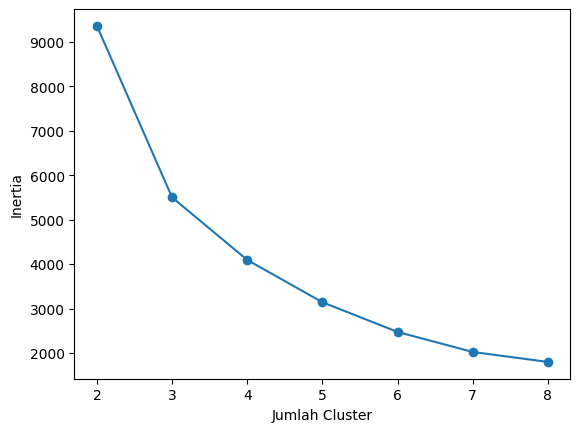

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.show()


In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [6]:
cluster_profile = rfm.groupby('Cluster').mean()
print(cluster_profile)


           CustomerID     Recency  Frequency       Monetary
Cluster                                                    
0        15282.157846   39.983906   4.852677    2012.111620
1        15354.225984  245.023788   1.582800     631.141410
2        15310.642857    6.142857  80.214286  122888.407143
